In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
#LabelEncoder is used to convert categorical data to numerical data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import kagglehub

In [6]:
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
data = pd.read_csv(path + "/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
# Now, let's find which features are important and not important. But, first, we're going to encode the categorical features.
# data.info()
# We can see that 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', and 'thal' are categorical features by their integer values. But 'thalach', 'oldpeak', and 'age' are continuous features. So, we will encode only the categorical features.
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
le = LabelEncoder()
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])
data.info()
data.head()
#So, what does this do? It converts the categorical features into numerical features. For example, in the 'sex' feature, 0 is male and 1 is female
#But, don't we have those features already in categorical form? Yes, but some algorithms work better with numerical data. So, it's a good practice to convert categorical data to numerical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
X = data.drop('target', axis=1) #Or, you can use X = data[Categorical_features]
y = data['target']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 79.51%
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



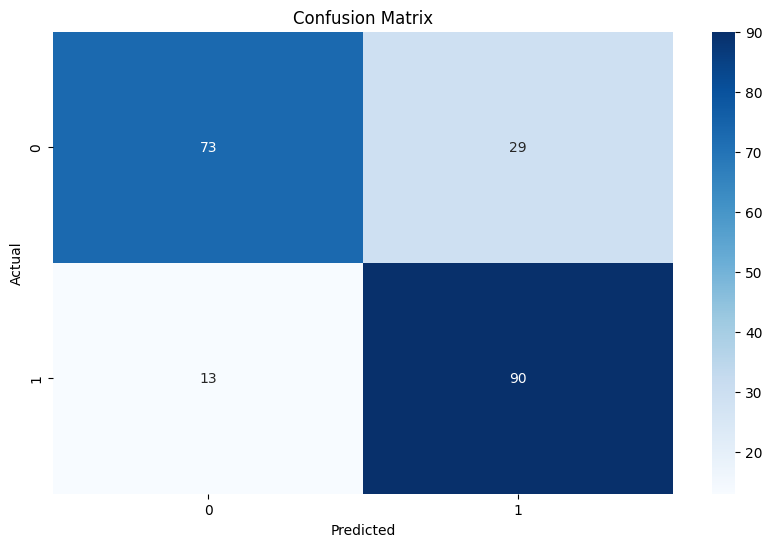

2D Accuracy: 77.07%


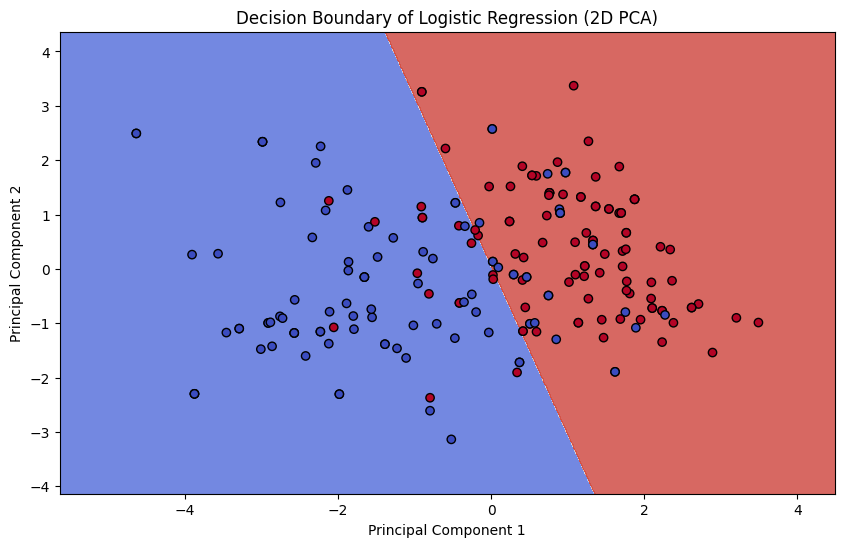

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Let's recall the gradient descent of logistic regression
# Cost function: J(θ) = -1/m * Σ [y(i) * log(hθ(x(i))) + (1 - y(i)) * log(1 - hθ(x(i)))]
# Where hθ(x) = 1 / (1 + e^(-θ^T * x))
# Gradient descent update rule: θ := θ - α * ∇J(θ)
# Where ∇J(θ) = 1/m * Σ (hθ(x(i)) - y(i)) * x(i)
# α is the learning rate
# m is the number of training examples
# θ is the parameter vector
# x(i) is the feature vector of the i-th training example
# y(i) is the label of the i-th training example
# Σ is the summation over all training examples
# e is the base of the natural logarithm
# T is the transpose operator
# Now, let's visualize the results
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Let's plot the decision boundary
# But, first, we need to reduce the dimensions of the data to 2D using
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)
model_2d = LogisticRegression()
model_2d.fit(X_train_2d, y_train)
y_pred_2d = model_2d.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"2D Accuracy: {accuracy_2d*100:.2f}%")
# Now, let's plot the decision boundary
x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', marker='o', cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary of Logistic Regression (2D PCA)')
plt.show()
# Let's visualize the results